# S2 Pandas S2

In [1]:
import pandas as pd
import numpy as np

In [2]:
from numpy.random import randn
np.random.seed(42)

In [3]:
df = pd.DataFrame(randn(5,4),index='0 1 2 3 4'.split(),columns='A B C D'.split())

In [4]:
df

A         B         C         D
0  0.496714 -0.138264  0.647689  1.523030
1 -0.234153 -0.234137  1.579213  0.767435
2 -0.469474  0.542560 -0.463418 -0.465730
3  0.241962 -1.913280 -1.724918 -0.562288
4 -1.012831  0.314247 -0.908024 -1.412304

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       5 non-null      float64
 2   C       5 non-null      float64
 3   D       5 non-null      float64
dtypes: float64(4)
memory usage: 200.0+ bytes


In [6]:
list(df)

['A', 'B', 'C', 'D']

## Seleção e indexação

Vamos aprender os vários métodos para pegar dados de um DataFrame

In [7]:
df['A']

0    0.496714
1   -0.234153
2   -0.469474
3    0.241962
4   -1.012831
Name: A, dtype: float64

In [8]:
# Valores unicos da coluna
df['A'].unique()

array([ 0.49671415, -0.23415337, -0.46947439,  0.24196227, -1.01283112])

In [9]:
# Passando uma lista com nomes das colunas
df[['B','C']]

B         C
0 -0.138264  0.647689
1 -0.234137  1.579213
2  0.542560 -0.463418
3 -1.913280 -1.724918
4  0.314247 -0.908024

In [10]:
# Sintaxe SQL (Não recomendado!)
df.A

0    0.496714
1   -0.234153
2   -0.469474
3    0.241962
4   -1.012831
Name: A, dtype: float64

As colunas dos DataFrames são Series

In [11]:
type(df['A'])

pandas.core.series.Series

** Criando uma coluna: **

In [12]:
df['SUM'] = df['A'] + df['B']

In [13]:
df

A         B         C         D       SUM
0  0.496714 -0.138264  0.647689  1.523030  0.358450
1 -0.234153 -0.234137  1.579213  0.767435 -0.468290
2 -0.469474  0.542560 -0.463418 -0.465730  0.073086
3  0.241962 -1.913280 -1.724918 -0.562288 -1.671318
4 -1.012831  0.314247 -0.908024 -1.412304 -0.698584

** Removendo colunas **

In [14]:
df.drop('SUM',axis=1)

A         B         C         D
0  0.496714 -0.138264  0.647689  1.523030
1 -0.234153 -0.234137  1.579213  0.767435
2 -0.469474  0.542560 -0.463418 -0.465730
3  0.241962 -1.913280 -1.724918 -0.562288
4 -1.012831  0.314247 -0.908024 -1.412304

In [15]:
df

A         B         C         D       SUM
0  0.496714 -0.138264  0.647689  1.523030  0.358450
1 -0.234153 -0.234137  1.579213  0.767435 -0.468290
2 -0.469474  0.542560 -0.463418 -0.465730  0.073086
3  0.241962 -1.913280 -1.724918 -0.562288 -1.671318
4 -1.012831  0.314247 -0.908024 -1.412304 -0.698584

In [16]:
df.drop('SUM',axis=1,inplace=True)

In [17]:
df

A         B         C         D
0  0.496714 -0.138264  0.647689  1.523030
1 -0.234153 -0.234137  1.579213  0.767435
2 -0.469474  0.542560 -0.463418 -0.465730
3  0.241962 -1.913280 -1.724918 -0.562288
4 -1.012831  0.314247 -0.908024 -1.412304

Também podemos deletar colunas desta forma:

In [18]:
df.drop('2',axis=0)

A         B         C         D
0  0.496714 -0.138264  0.647689  1.523030
1 -0.234153 -0.234137  1.579213  0.767435
3  0.241962 -1.913280 -1.724918 -0.562288
4 -1.012831  0.314247 -0.908024 -1.412304

** Selecionando linhas: **

In [19]:
df.loc['2']

A   -0.469474
B    0.542560
C   -0.463418
D   -0.465730
Name: 2, dtype: float64

Ou selecione com base na posição em vez do rótulo

In [20]:
df.iloc[1]

A   -0.234153
B   -0.234137
C    1.579213
D    0.767435
Name: 1, dtype: float64

** Selecionando o subconjunto de linhas e colunas **

In [21]:
df.loc['3','B']

-1.913280244657798

In [22]:
df.loc[['2','3'],['C','D']]

C         D
2 -0.463418 -0.465730
3 -1.724918 -0.562288

### Seleção condicional

Uma característica importante dos pandas é a seleção condicional usando notação de colchetes, muito semelhante ao numpy:

In [23]:
df

A         B         C         D
0  0.496714 -0.138264  0.647689  1.523030
1 -0.234153 -0.234137  1.579213  0.767435
2 -0.469474  0.542560 -0.463418 -0.465730
3  0.241962 -1.913280 -1.724918 -0.562288
4 -1.012831  0.314247 -0.908024 -1.412304

In [24]:
df>0

A      B      C      D
0   True  False   True   True
1  False  False   True   True
2  False   True  False  False
3   True  False  False  False
4  False   True  False  False

In [25]:
df[df>0]

A         B         C         D
0  0.496714       NaN  0.647689  1.523030
1       NaN       NaN  1.579213  0.767435
2       NaN  0.542560       NaN       NaN
3  0.241962       NaN       NaN       NaN
4       NaN  0.314247       NaN       NaN

In [26]:
df[df['A']>0]

A         B         C         D
0  0.496714 -0.138264  0.647689  1.523030
3  0.241962 -1.913280 -1.724918 -0.562288

In [27]:
df[df['A']>0]['B']

0   -0.138264
3   -1.913280
Name: B, dtype: float64

In [28]:
df[df['A']>0][['C','D']]

C         D
0  0.647689  1.523030
3 -1.724918 -0.562288

Para duas condições, você pode usar | e & com parênteses:

In [29]:
df[(df['A']>0) & (df['C'] < 0)]

A        B         C         D
3  0.241962 -1.91328 -1.724918 -0.562288

## Mais Detalhes do Índice

Vamos discutir mais alguns recursos de indexação, incluindo resetar o índice ou configurá-lo de outra forma. Também falaremos sobre hierarquia de índice!

In [30]:
df

A         B         C         D
0  0.496714 -0.138264  0.647689  1.523030
1 -0.234153 -0.234137  1.579213  0.767435
2 -0.469474  0.542560 -0.463418 -0.465730
3  0.241962 -1.913280 -1.724918 -0.562288
4 -1.012831  0.314247 -0.908024 -1.412304

In [31]:
# Redefinir para o padrão 0,1 ... n índice
df.reset_index()

index         A         B         C         D
0     0  0.496714 -0.138264  0.647689  1.523030
1     1 -0.234153 -0.234137  1.579213  0.767435
2     2 -0.469474  0.542560 -0.463418 -0.465730
3     3  0.241962 -1.913280 -1.724918 -0.562288
4     4 -1.012831  0.314247 -0.908024 -1.412304

In [32]:
novoind = 'X Y Z W K'.split()

In [33]:
df['new_ind'] = novoind

In [34]:
df

A         B         C         D new_ind
0  0.496714 -0.138264  0.647689  1.523030       X
1 -0.234153 -0.234137  1.579213  0.767435       Y
2 -0.469474  0.542560 -0.463418 -0.465730       Z
3  0.241962 -1.913280 -1.724918 -0.562288       W
4 -1.012831  0.314247 -0.908024 -1.412304       K

In [35]:
df.set_index('new_ind')

A         B         C         D
new_ind                                        
X        0.496714 -0.138264  0.647689  1.523030
Y       -0.234153 -0.234137  1.579213  0.767435
Z       -0.469474  0.542560 -0.463418 -0.465730
W        0.241962 -1.913280 -1.724918 -0.562288
K       -1.012831  0.314247 -0.908024 -1.412304

In [36]:
df

A         B         C         D new_ind
0  0.496714 -0.138264  0.647689  1.523030       X
1 -0.234153 -0.234137  1.579213  0.767435       Y
2 -0.469474  0.542560 -0.463418 -0.465730       Z
3  0.241962 -1.913280 -1.724918 -0.562288       W
4 -1.012831  0.314247 -0.908024 -1.412304       K

In [37]:
df.set_index('new_ind',inplace=True)

In [38]:
df

A         B         C         D
new_ind                                        
X        0.496714 -0.138264  0.647689  1.523030
Y       -0.234153 -0.234137  1.579213  0.767435
Z       -0.469474  0.542560 -0.463418 -0.465730
W        0.241962 -1.913280 -1.724918 -0.562288
K       -1.012831  0.314247 -0.908024 -1.412304

# Groupby

O método groupby permite agrupar linhas de dados em conjunto e chamar funções agregadas

In [39]:
import pandas as pd
# Cria um DataFrame
data = {'Empresa':['A','A','A','B','B','B','C','C','C'],
       'Vendedor':['Joao','Claudia','Claudia','Marcos','Vanessa','Vanessa','Thais','Thais','Nathalia'],
       'Valor_Venda':[200,120,110,340,124,205,243,350,300]}

In [40]:
df = pd.DataFrame(data)

In [41]:
df

Empresa  Vendedor  Valor_Venda
0       A      Joao          200
1       A   Claudia          120
2       A   Claudia          110
3       B    Marcos          340
4       B   Vanessa          124
5       B   Vanessa          205
6       C     Thais          243
7       C     Thais          350
8       C  Nathalia          300

** Agora, você pode usar o método .group by () para agrupar as linhas em conjunto com base em um nome de coluna. Por exemplo, vamos agrupar com base na empresa. Isso criará um objeto DataFrameGroupBy:**

In [42]:
df.groupby('Empresa')

In [43]:
df.groupby(['Empresa', 'Vendedor'])['Valor_Venda'].sum()

Empresa  Vendedor
A        Claudia     230
         Joao        200
B        Marcos      340
         Vanessa     329
C        Nathalia    300
         Thais       593
Name: Valor_Venda, dtype: int64

In [44]:
df.groupby(['Empresa', 'Vendedor'])['Valor_Venda'].sum().reset_index(name='soma_venda')

Empresa  Vendedor  soma_venda
0       A   Claudia         230
1       A      Joao         200
2       B    Marcos         340
3       B   Vanessa         329
4       C  Nathalia         300
5       C     Thais         593

In [45]:
df.sort_values(by='Valor_Venda')

Empresa  Vendedor  Valor_Venda
2       A   Claudia          110
1       A   Claudia          120
4       B   Vanessa          124
0       A      Joao          200
5       B   Vanessa          205
6       C     Thais          243
8       C  Nathalia          300
3       B    Marcos          340
7       C     Thais          350

In [46]:
df[df.Vendedor=='Nathalia']

Empresa  Vendedor  Valor_Venda
8       C  Nathalia          300

Você pode salvar este objeto como uma nova variável:

In [47]:
por_companhia = df.groupby("Empresa")

In [48]:
por_companhia

E, em seguida, chamar métodos agregados do objeto:

In [49]:
por_companhia.mean()

Valor_Venda
Empresa             
A         143.333333
B         223.000000
C         297.666667

In [50]:
df.groupby('Empresa').mean()

Valor_Venda
Empresa             
A         143.333333
B         223.000000
C         297.666667

Mais exemplos de métodos agregados:

In [51]:
por_companhia.std()

Valor_Venda
Empresa             
A          49.328829
B         109.119201
C          53.538148

In [52]:
por_companhia.min()

Vendedor  Valor_Venda
Empresa                       
A         Claudia          110
B          Marcos          124
C        Nathalia          243

In [53]:
por_companhia.max()

Vendedor  Valor_Venda
Empresa                      
A           Joao          200
B        Vanessa          340
C          Thais          350

In [54]:
por_companhia.count()

Vendedor  Valor_Venda
Empresa                       
A               3            3
B               3            3
C               3            3

In [55]:
por_companhia.describe()

Valor_Venda                                                           
              count        mean         std    min    25%    50%    75%    max
Empresa                                                                       
A               3.0  143.333333   49.328829  110.0  115.0  120.0  160.0  200.0
B               3.0  223.000000  109.119201  124.0  164.5  205.0  272.5  340.0
C               3.0  297.666667   53.538148  243.0  271.5  300.0  325.0  350.0

In [56]:
por_companhia.describe().transpose()

Empresa                     A           B           C
Valor_Venda count    3.000000    3.000000    3.000000
            mean   143.333333  223.000000  297.666667
            std     49.328829  109.119201   53.538148
            min    110.000000  124.000000  243.000000
            25%    115.000000  164.500000  271.500000
            50%    120.000000  205.000000  300.000000
            75%    160.000000  272.500000  325.000000
            max    200.000000  340.000000  350.000000

In [57]:
por_companhia.describe().transpose()['A']

Valor_Venda  count      3.000000
             mean     143.333333
             std       49.328829
             min      110.000000
             25%      115.000000
             50%      120.000000
             75%      160.000000
             max      200.000000
Name: A, dtype: float64

## Concatenate, Merge e Join

In [58]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [59]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [60]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [61]:
df1

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

In [62]:
df2

A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

In [63]:
df3

A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

## Concatenação

Concatenação basicamente "cola" DataFrames. Tenha em mente que as dimensões devem corresponder ao longo do eixo que você está concatenando. Você pode usar ** pd.concat ** e passar uma lista de DataFrames para concatenar juntos:

In [64]:
pd.concat([df1,df2,df3])

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [65]:
pd.concat([df1,df2,df3],axis=1)

A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   D7  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A8   B8   C8   D8
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A9   B9   C9   D9
10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A10  B10  C10  D10
11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A11  B11  C11  D11

_____
## Outros DataFrames

In [66]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [67]:
left

key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

In [68]:
right

key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3

## Merge

A função ** merge ** permite que você mescle os quadros de dados juntos usando uma lógica semelhante à mesclagem de tabelas SQL juntas. Por exemplo:

In [69]:
pd.merge(left,right,how='inner',on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3

Ou para mostrar um exemplo mais complicado:

In [70]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [71]:
pd.merge(left, right, on=['key1', 'key2'])

key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2

In [72]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3

In [73]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3

In [74]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN

## Join
join é um método conveniente para combinar as colunas de dois DataFrames indexados potencialmente diferentes em um único resultado DataFrame.

In [75]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [76]:
left

A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2

In [77]:
right

C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3

In [78]:
left.join(right)

A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2

In [79]:
left.join(right, how='outer')

A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3

# Dados ausentes / Missing

In [80]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [81]:
df

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  NaN  NaN  3

In [82]:
df.dropna()

A    B  C
0  1.0  5.0  1

In [83]:
df.dropna(axis=1)

C
0  1
1  2
2  3

In [84]:
df.dropna(thresh=2)

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2

In [85]:
df.fillna(value='Conteúdo')

A         B  C
0         1         5  1
1         2  Conteúdo  2
2  Conteúdo  Conteúdo  3

In [86]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

## Entrada e Saida de Dados

### CSV Input

In [87]:
df = pd.read_csv('exemplo')
df

a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15

### Saída de dados tipo CSV 

In [88]:
df.to_csv('exemplo.csv',index=False)

Ex sql


import pypyodbc

conn = pypyodbc.connect("DRIVER={SQL Server};\
                        SERVER=serveraddress;\
                        UID=uid;\
                        PWD=pwd;\
                        DATABASE=db")

df1 = pd.read_frame('SELECT * FROM dbo.table1', conn)

# Graficos

### Tipos de plotagem

Existem vários tipos de plots incorporados aos pandas, a maioria deles plots estatísticos por natureza:

* df.plot.area
* df.plot.barh
* df.plot.density
* df.plot.hist
* df.plot.line
* df.plot.scatter
* df.plot.bar
* df.plot.box
* df.plot.hexbin
* df.plot.kde
* df.plot.pie

Você também pode simplesmente chamar df.plot (kind = 'hist') ou substituir esse argumento por qualquer um dos termos-chave mostrados na lista acima (por exemplo, 'caixa', 'barh', etc.)
___

### import dataframes para exemplo

In [89]:
df_plot_1 = pd.read_csv('df_plot1',index_col=0)
df_plot_2 = pd.read_csv('df_plot2')
df_plot_3 = pd.read_csv('df_plot3')

## Areas

In [90]:
df_plot_2.head()

a         b         c         d
0  0.039762  0.218517  0.103423  0.957904
1  0.937288  0.041567  0.899125  0.977680
2  0.780504  0.008948  0.557808  0.797510
3  0.672717  0.247870  0.264071  0.444358
4  0.053829  0.520124  0.552264  0.190008

In [91]:
df_plot_2.plot.area(alpha=0.3)

## Barplots

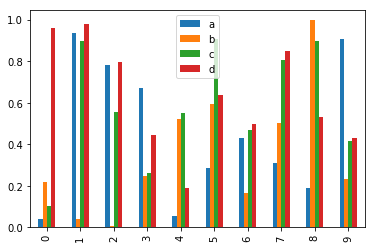

In [92]:
df_plot_2.plot.bar()

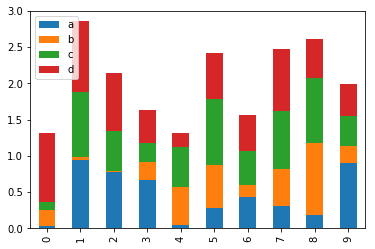

In [93]:
df_plot_2.plot.bar(stacked=True)

## Histogramas

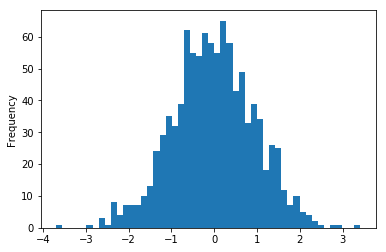

In [94]:
df_plot_1['A'].plot.hist(bins=50)

## Line Plots

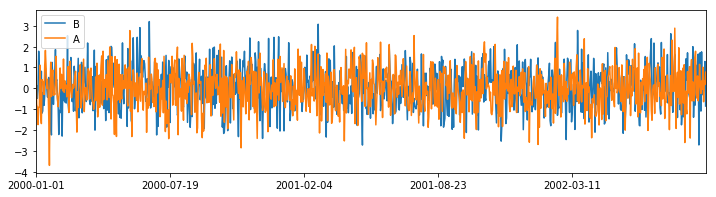

In [95]:
df_plot_1.plot.line(y= ['B', 'A'],figsize=(12,3))

## Scatter Plots

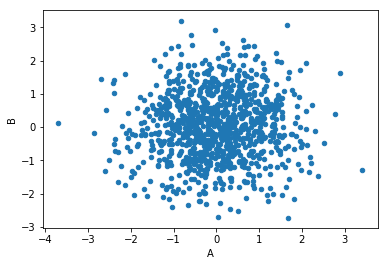

In [96]:
df_plot_1.plot.scatter(x='A',y='B')

Você pode usar c para colorir com base em outro valor de coluna.
Use o cmap para indicar o mapa de cores a ser usado.
Para todos os colormaps, confira: http://matplotlib.org/users/colormaps.html

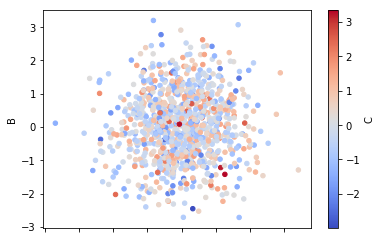

In [97]:
df_plot_1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

Ou use s para indicar o tamanho com base em outra coluna. s parâmetro precisa ser uma matriz, não apenas o nome de uma coluna:

/home/pc/projects/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


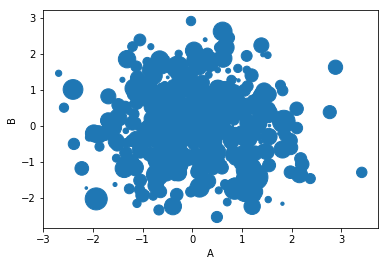

In [98]:
df_plot_1.plot.scatter(x='A',y='B',s=df_plot_1['C']*200)

## BoxPlots

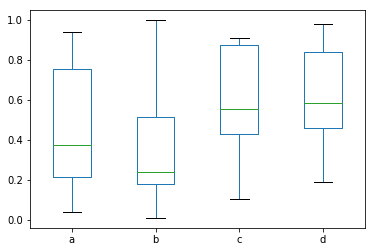

In [99]:
df_plot_2.plot.box()